# Classical Mechanics

In classical mechanics, a physical system is described by a set of canonical coordinates $(\mathbf{q}, \mathbf{p})$, where each component of the coordinate $q_i$, $p_i$ ($i=0,1,\dots,N-1$, where $N$ is the number of degrees of freedom) is indexed to the frame of reference of the system.

The time evolution of the system is uniquely defined by Hamilton's equations:

$$\left\{
\begin{array}{l}
\frac{d q_i}{d t}= \left\{q_i,H\right\} +\frac{\partial H}{\partial t} \\
\frac{d p_i}{d t}= \left\{p_i,H\right\} +\frac{\partial H}{\partial t}
\end{array}\right.
\;\;\; \forall i=0,1,\dots, N-1$$

where $H = H(\mathbf{q}, \mathbf{p}, t)$ is the Hamiltonian, which often corresponds to the total energy of the system, and the Poisson bracket is defined as $\left\{a,b\right\}=\sum_{i=0}^{N-1}\left(\frac{\partial a}{\partial q_i}\frac{\partial b}{\partial p_i}-\frac{\partial a}{\partial p_i}\frac{\partial b}{\partial q_i}\right)$. The canonical Poisson brackets are: 

$$\left\{\hat{q}_i,\hat{p}_j\right\}= \delta_{ij}$$

where $\delta_{ij}$ is the Kronecker delta (i.e., identity matrix). 

Using the canonical Poisson brackets, we can write:

$$\left\{q_i,H\right\} =\sum_{j=0}^{N-1}\left(\frac{\partial q_i}{\partial q_j}\frac{\partial H}{\partial p_i}-\frac{\partial q_i}{\partial p_j}\frac{\partial H}{\partial q_i}\right)=\frac{\partial H}{\partial p_i}$$


$$\left\{p_i,H\right\} =\sum_{j=0}^{N-1}\left(\frac{\partial p_i}{\partial q_j}\frac{\partial H}{\partial p_i}-\frac{\partial p_i}{\partial p_j}\frac{\partial H}{\partial q_i}\right)=-\frac{\partial H}{\partial q_i}$$

For a closed system, the Hamiltonian does not depend on time (i.e., $\frac{\partial H}{\partial t}=0$), yielding the following coupled ODEs:

$$\left\{
\begin{array}{l}
\frac{d q_i}{d t}= \frac{\partial H}{\partial p_i} \\
\frac{d p_i}{d t}= -\frac{\partial H}{\partial q_i}
\end{array}\right.
\;\;\; \forall i=0,1,\dots, N-1$$

The coupled ODEs can be solved once we know $H(q_0, q_1, \dots, q_{N-1}, p_0, p_1, \dots, p_{N-1})$ and the initial conditions $q_i(t=0)$, $p_i(t=0)$ $\forall i =0,1,\dots, N-1$. Typically $H$ is written as the sum of the kinetic ($K$) and potential energy ($U$) of the system. 

## Free particle

A particle with mass $m$ is free to move in 3D. In this case N=3.

$$K=\frac{p_x^2}{2m}+\frac{p_y^2}{2m}+\frac{p_z^2}{2m}=\frac{p^2}{2m}$$

$$U=0$$

Therefore the Hamiltonian ($H=K+U$) is:

$$H(q_x,q_y,q_z,p_x,p_y,p_z)=\frac{p_x^2}{2m}+\frac{p_y^2}{2m}+\frac{p_z^2}{2m}$$

The equations of motion are:

$$\left\{
\begin{array}{l}
\frac{d q_x}{d t}= \frac{p_x}{m} \\
\frac{d q_y}{d t}= \frac{p_y}{m} \\
\frac{d q_z}{d t}= \frac{p_z}{m} \\
\frac{d p_x}{d t}= 0 \\
\frac{d p_y}{d t}= 0 \\
\frac{d p_z}{d t}= 0 
\end{array}\right.$$

Let's solve the problem considering that $m=1$ Kg, and the following initial conditions

$$\mathbf{q}_0=(0,0,0)$$

$$\mathbf{p}_0=(10,0,0)$$

In [1]:
import numpy as np
from scipy import integrate

m = 1
var0 = (0,0,0,10,0,0)

def deriv(t,var,m):
    qx, qy, qz, px, py, pz = var 
    return (px/m, py/m, pz/m, 0, 0, 0)

t_span = (0,100)
t = np.linspace(t_span[0],t_span[1],1000)

sol = integrate.solve_ivp(deriv, t_span, var0, t_eval=t, args=(m,))

print(sol.t.shape)
print(sol.y.shape)

(1000,)
(6, 1000)


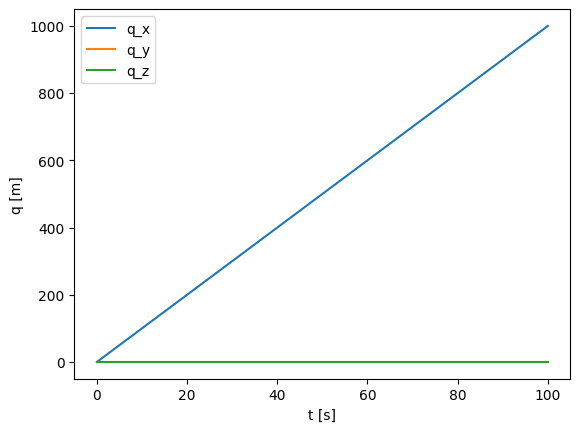

In [2]:
import matplotlib.pyplot as plt

plt.plot(sol.t,sol.y[0],label=r"q_x")
plt.plot(sol.t,sol.y[1],label=r"q_y")
plt.plot(sol.t,sol.y[2],label=r"q_z")
plt.xlabel("t [s]")
plt.ylabel("q [m]")
plt.legend()

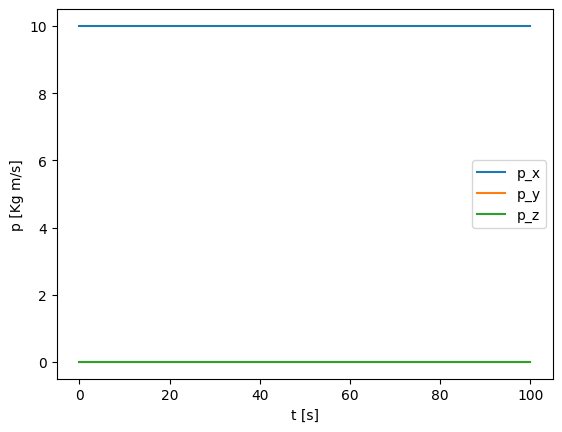

In [3]:
import matplotlib.pyplot as plt

plt.plot(sol.t,sol.y[3],label=r"p_x")
plt.plot(sol.t,sol.y[4],label=r"p_y")
plt.plot(sol.t,sol.y[5],label=r"p_z")
plt.xlabel("t [s]")
plt.ylabel("p [Kg m/s]")
plt.legend()

## Free fall

A particle with mass $m$ is subject to the gravitational pull ($g$). In this case N=3.

$$K=\frac{p_x^2}{2m}+\frac{p_y^2}{2m}+\frac{p_z^2}{2m}=\frac{p^2}{2m}$$

$$U=mg q_z$$

Therefore the Hamiltonian ($H=K+U$) is:

$$H(q_x,q_y,q_z,p_x,p_y,p_z)=\frac{p_x^2}{2m}+\frac{p_y^2}{2m}+\frac{p_z^2}{2m}+mgq_z$$

The equations of motion are:

$$\left\{
\begin{array}{l}
\frac{d q_x}{d t}= \frac{p_x}{m} \\
\frac{d q_y}{d t}= \frac{p_y}{m} \\
\frac{d q_z}{d t}= \frac{p_z}{m} \\
\frac{d p_x}{d t}= 0 \\
\frac{d p_y}{d t}= 0 \\
\frac{d p_z}{d t}= -mg 
\end{array}\right.$$

Let's solve the problem considering that $m=1$ Kg, and the following initial conditions

$$\mathbf{q}_0=(0,0,0)$$

$$\mathbf{p}_0=(10,0,0)$$

In [4]:
import numpy as np
from scipy import integrate
from scipy import constants

m = 1
var0 = (0,0,0,10,0,0)

print(constants.g)

def deriv(t,var,m):
    qx, qy, qz, px, py, pz = var 
    return (px/m, py/m, pz/m, 0, 0, -m*constants.g)

t_span = (0,10)
t = np.linspace(t_span[0],t_span[1],1000)

sol = integrate.solve_ivp(deriv, t_span, var0, t_eval=t, args=(m,))

9.80665


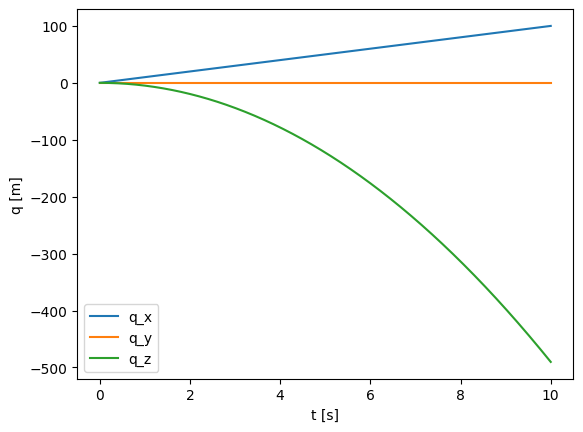

In [5]:
import matplotlib.pyplot as plt

plt.plot(sol.t,sol.y[0],label=r"q_x")
plt.plot(sol.t,sol.y[1],label=r"q_y")
plt.plot(sol.t,sol.y[2],label=r"q_z")
plt.xlabel("t [s]")
plt.ylabel("q [m]")
plt.legend()

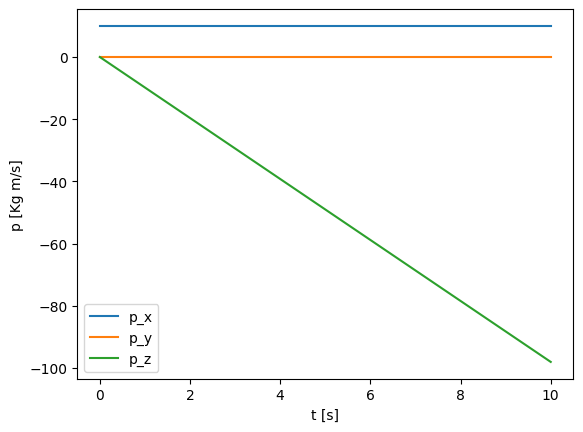

In [6]:
import matplotlib.pyplot as plt

plt.plot(sol.t,sol.y[3],label=r"p_x")
plt.plot(sol.t,sol.y[4],label=r"p_y")
plt.plot(sol.t,sol.y[5],label=r"p_z")
plt.xlabel("t [s]")
plt.ylabel("p [Kg m/s]")
plt.legend()

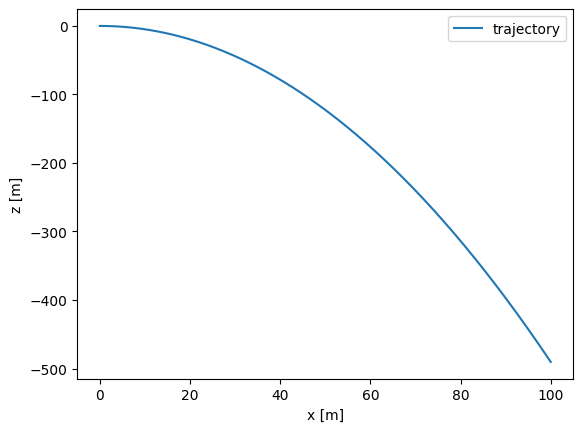

In [7]:
import matplotlib.pyplot as plt

plt.plot(sol.y[0],sol.y[2],label=r"trajectory")
plt.xlabel("x [m]")
plt.ylabel("z [m]")
plt.legend()

## Harmonic oscillator

A particle with mass $m$ is subject to the Harmonic potential in the x direction with constant $k$. In this case N=3.

$$K=\frac{p_x^2}{2m}+\frac{p_y^2}{2m}+\frac{p_z^2}{2m}=\frac{p^2}{2m}$$

$$U=\frac{1}{2}kq_x^2$$

Therefore the Hamiltonian ($H=K+U$) is:

$$H(q_x,q_y,q_z,p_x,p_y,p_z)=\frac{p_x^2}{2m}+\frac{p_y^2}{2m}+\frac{p_z^2}{2m}+\frac{1}{2}kq_x^2$$

The equations of motion are:

$$\left\{
\begin{array}{l}
\frac{d q_x}{d t}= \frac{p_x}{m} \\
\frac{d q_y}{d t}= \frac{p_y}{m} \\
\frac{d q_z}{d t}= \frac{p_z}{m} \\
\frac{d p_x}{d t}= -kq_x \\
\frac{d p_y}{d t}= 0 \\
\frac{d p_z}{d t}= 0 
\end{array}\right.$$

Let's solve the problem considering that $m=1$ Kg, $k=1$ $N/m$, and the following initial conditions

$$\mathbf{q}_0=(0,0,0)$$

$$\mathbf{p}_0=(10,0,0)$$

In [8]:
import numpy as np
from scipy import integrate

m = 1
k = 1
var0 = (0,0,0,10,0,0)

def deriv(t,var,m,k):
    qx, qy, qz, px, py, pz = var 
    return (px/m, py/m, pz/m, -k*qx, 0, 0)

t_span = (0,10)
t = np.linspace(0,10,1000)

sol = integrate.solve_ivp(deriv, t_span, var0, t_eval=t, args=(m,k))

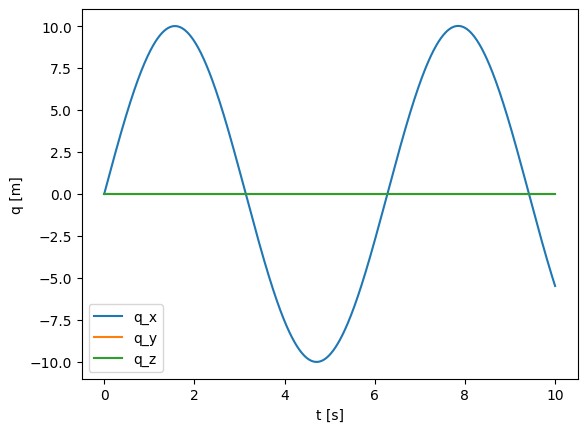

In [9]:
import matplotlib.pyplot as plt

plt.plot(sol.t,sol.y[0],label=r"q_x")
plt.plot(sol.t,sol.y[1],label=r"q_y")
plt.plot(sol.t,sol.y[2],label=r"q_z")
plt.xlabel("t [s]")
plt.ylabel("q [m]")
plt.legend()

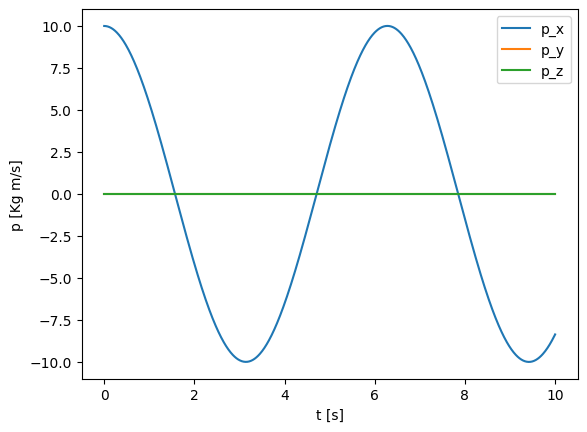

In [10]:
import matplotlib.pyplot as plt

plt.plot(sol.t,sol.y[3],label=r"p_x")
plt.plot(sol.t,sol.y[4],label=r"p_y")
plt.plot(sol.t,sol.y[5],label=r"p_z")
plt.xlabel("t [s]")
plt.ylabel("p [Kg m/s]")
plt.legend()

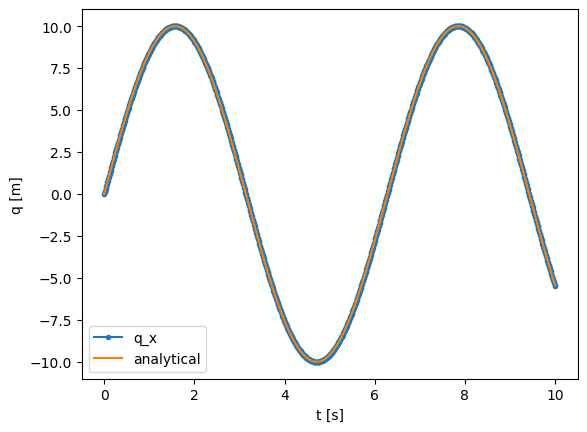

In [11]:
import matplotlib.pyplot as plt

omega = np.sqrt(k/m)

plt.plot(sol.t,sol.y[0],label=r"q_x",marker=".")
plt.plot(sol.t,sol.y[3,0]*np.sin(omega*sol.t),label=r"analytical")
plt.xlabel("t [s]")
plt.ylabel("q [m]")
plt.legend()